In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_label = pd.read_csv('/content/drive/MyDrive/Data_Set/glaucoma.csv')
y_train = train_label['Glaucoma']
train_label.head()

,Filename,ExpCDR,Eye,Set,Glaucoma
0,001.jpg,0.7097,OD,A,0
1,002.jpg,0.6953,OS,A,0
2,003.jpg,0.9629,OS,A,0
3,004.jpg,0.7246,OD,A,0
4,005.jpg,0.6138,OS,A,0


JPEG
RGB
(3072, 2048)


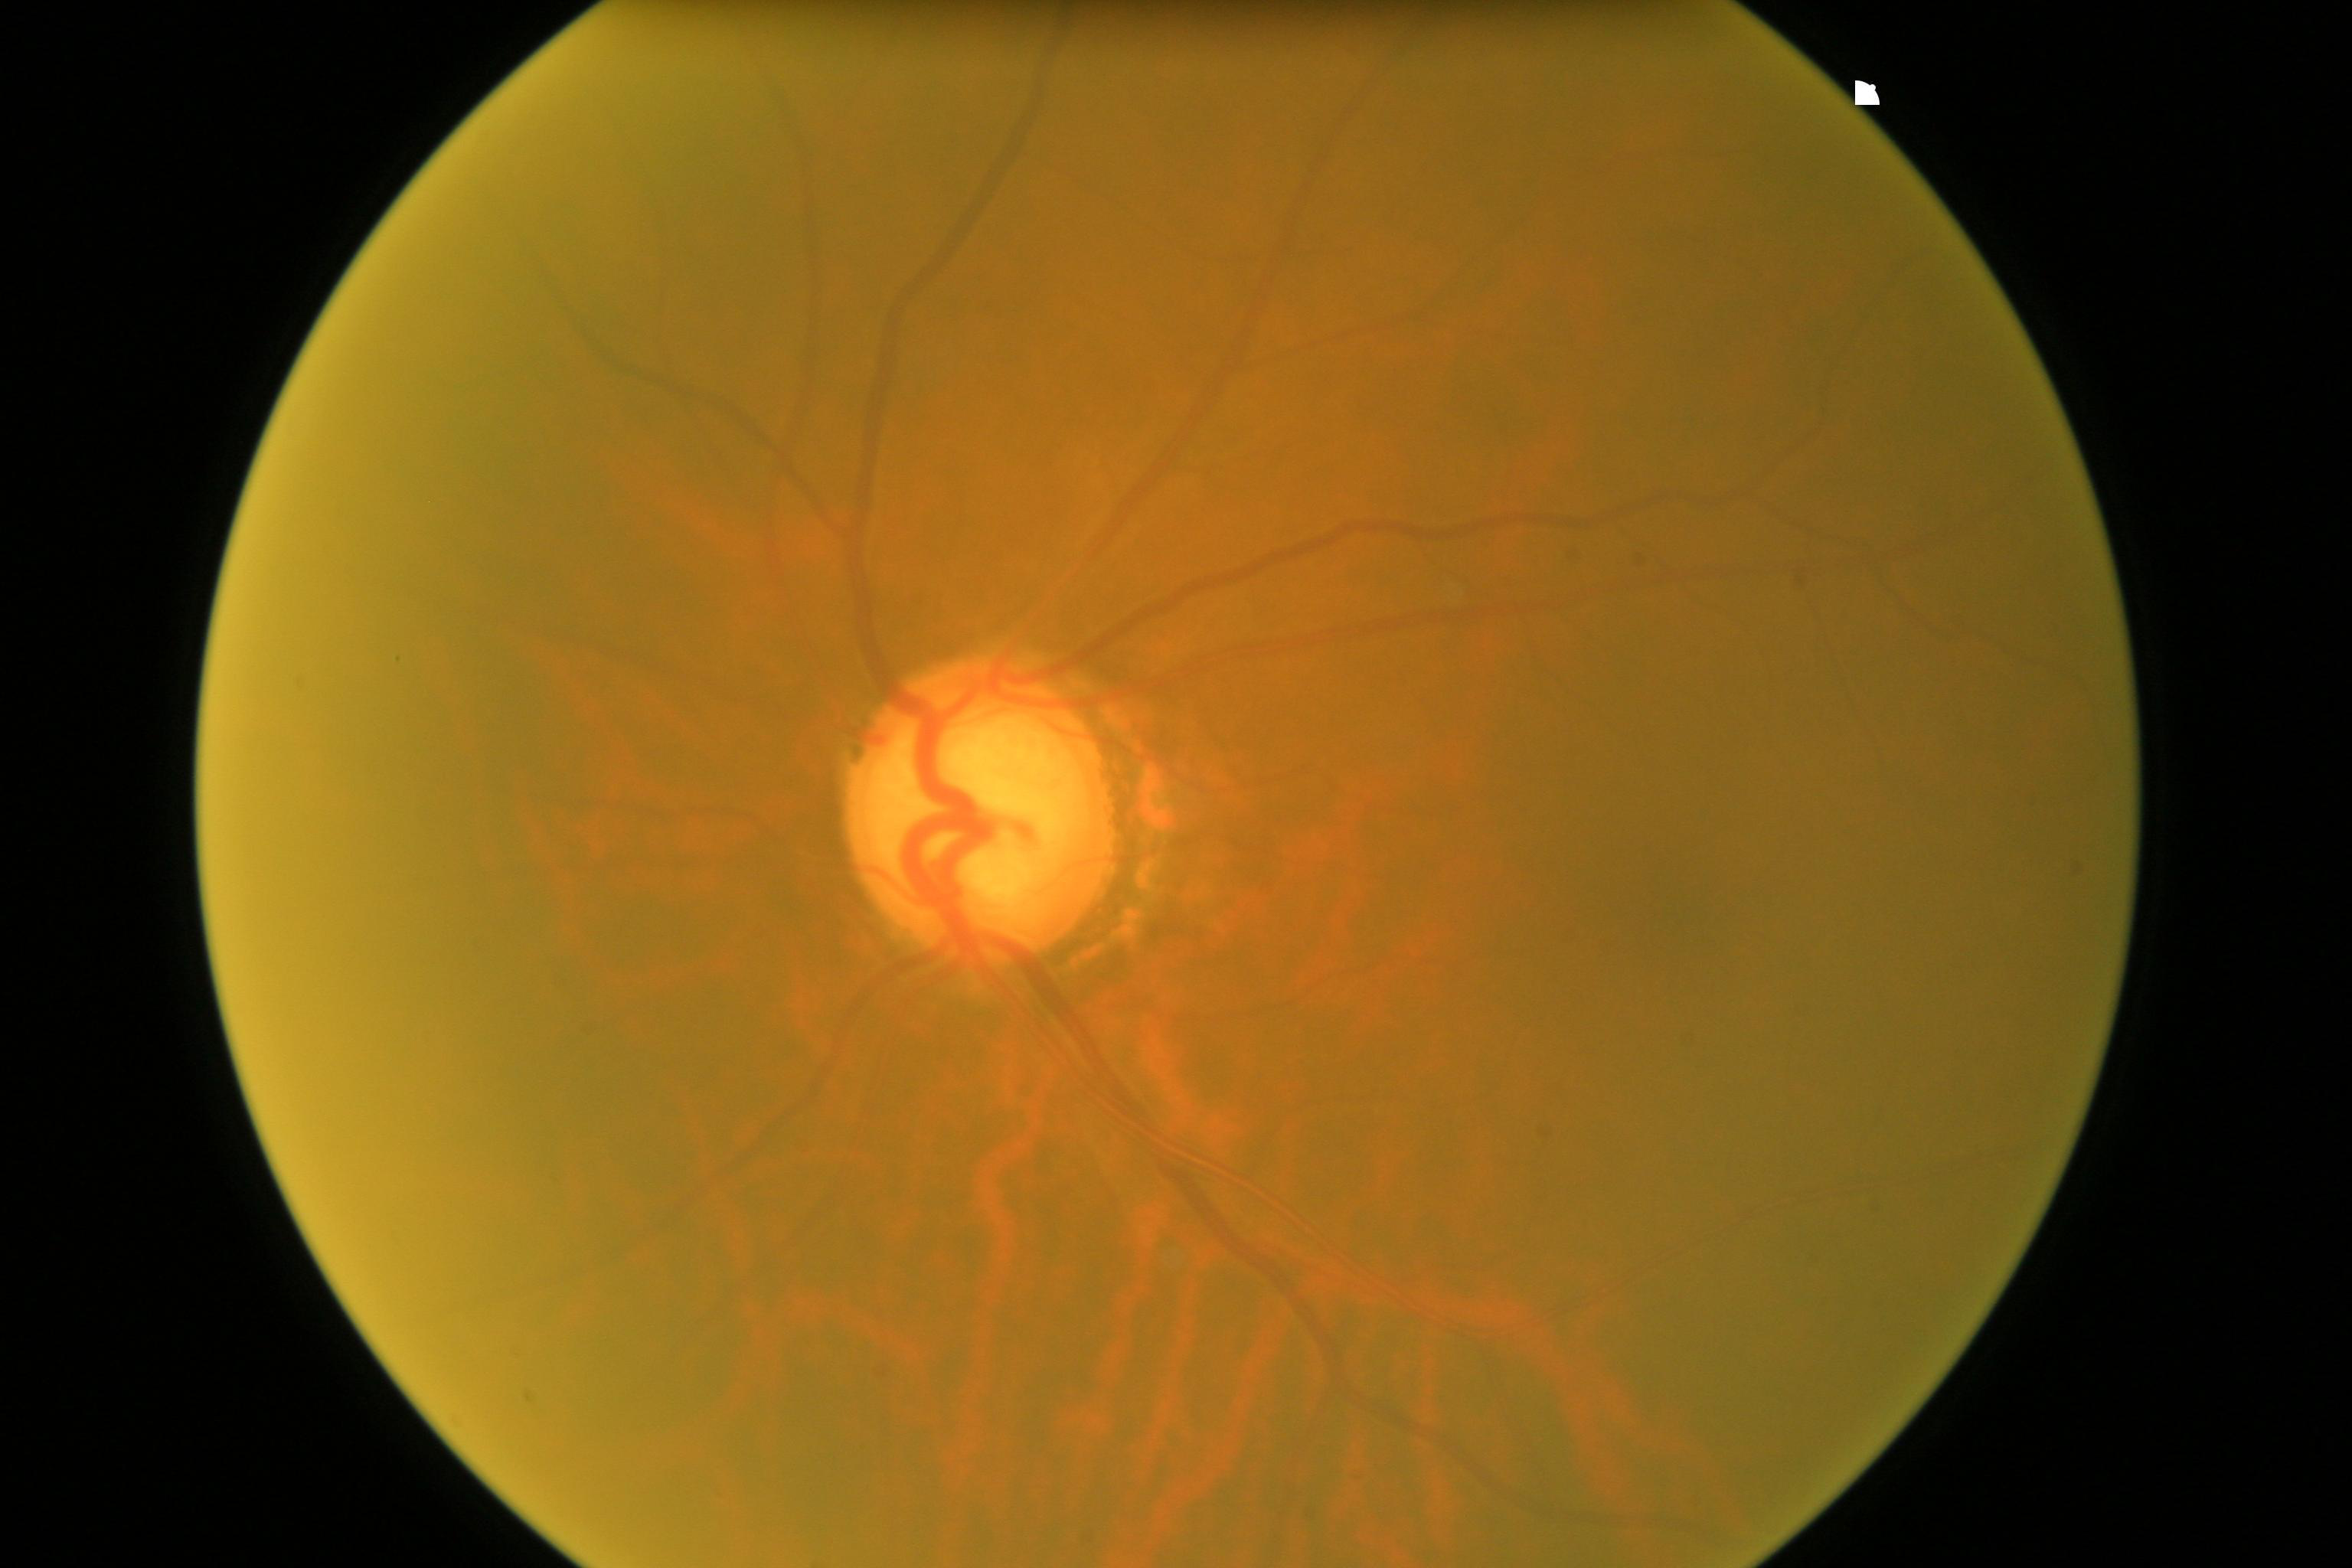

In [ ]:
from numpy import asarray

from PIL import Image
# load the image
image = Image.open('/content/drive/MyDrive/Data_Set/Fundus_Scanes_Sorted/Validation/Glaucoma_Positive/613.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()
pixels = asarray(image)

In [ ]:
# global centering

# calculate global mean
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# global centering of pixels
pixels = pixels - mean
# confirm it had the desired effect
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
print(pixels)


Mean: 73.462
Min: 0.000, Max: 255.000
Mean: 0.000
Min: -73.462, Max: 181.538
[[[-71.46201356 -71.46201356 -73.46201356]
  [-71.46201356 -71.46201356 -73.46201356]
  [-71.46201356 -71.46201356 -73.46201356]
  ...
  [-72.46201356 -72.46201356 -73.46201356]
  [-72.46201356 -72.46201356 -73.46201356]
  [-72.46201356 -72.46201356 -73.46201356]]

 [[-71.46201356 -71.46201356 -73.46201356]
  [-71.46201356 -71.46201356 -73.46201356]
  [-71.46201356 -71.46201356 -73.46201356]
  ...
  [-72.46201356 -72.46201356 -73.46201356]
  [-72.46201356 -72.46201356 -73.46201356]
  [-72.46201356 -72.46201356 -73.46201356]]

 [[-71.46201356 -71.46201356 -73.46201356]
  [-71.46201356 -71.46201356 -73.46201356]
  [-71.46201356 -71.46201356 -73.46201356]
  ...
  [-72.46201356 -72.46201356 -73.46201356]
  [-72.46201356 -72.46201356 -73.46201356]
  [-72.46201356 -72.46201356 -73.46201356]]

 ...

 [[-73.46201356 -73.46201356 -73.46201356]
  [-73.46201356 -73.46201356 -73.46201356]
  [-73.46201356 -73.46201356 -73.

In [ ]:
# example of pixel normalization
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
mean = pixels.mean()
print('pixel mean = ', mean)

# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
print(pixels)

Data Type: float64
Min: -73.462, Max: 181.538
pixel mean =  1.3986008e-09
Min: -0.288, Max: 0.712
[[[-0.2802432  -0.2802432  -0.28808632]
  [-0.2802432  -0.2802432  -0.28808632]
  [-0.2802432  -0.2802432  -0.28808632]
  ...
  [-0.28416476 -0.28416476 -0.28808632]
  [-0.28416476 -0.28416476 -0.28808632]
  [-0.28416476 -0.28416476 -0.28808632]]

 [[-0.2802432  -0.2802432  -0.28808632]
  [-0.2802432  -0.2802432  -0.28808632]
  [-0.2802432  -0.2802432  -0.28808632]
  ...
  [-0.28416476 -0.28416476 -0.28808632]
  [-0.28416476 -0.28416476 -0.28808632]
  [-0.28416476 -0.28416476 -0.28808632]]

 [[-0.2802432  -0.2802432  -0.28808632]
  [-0.2802432  -0.2802432  -0.28808632]
  [-0.2802432  -0.2802432  -0.28808632]
  ...
  [-0.28416476 -0.28416476 -0.28808632]
  [-0.28416476 -0.28416476 -0.28808632]
  [-0.28416476 -0.28416476 -0.28808632]]

 ...

 [[-0.28808632 -0.28808632 -0.28808632]
  [-0.28808632 -0.28808632 -0.28808632]
  [-0.28808632 -0.28808632 -0.28808632]
  ...
  [-0.28416476 -0.28416476

#Visualization

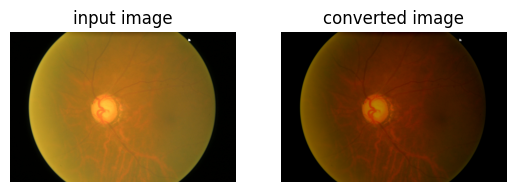

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(image)
ax0.axis('off')
ax0.set_title('input image')
ax1.imshow(pixels)
ax1.axis('off')
ax1.set_title('converted image')
plt.show()

In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

#Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

#Modeling

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/Data_Set/Fundus_Scanes_Sorted/Train'

TEST_DIR = '/content/drive/MyDrive/Data_Set/Fundus_Scanes_Sorted/Validation'

In [ ]:
from keras.applications.resnet import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD, Adam
from keras.callbacks import TensorBoard
import keras
import matplotlib.pyplot as plt

In [ ]:
HEIGHT = 300
WIDTH = 300

BATCH_SIZE = 8
class_list = ["class_1", "class_2"]
FC_LAYERS = [1024, 512, 256]
dropout = 0.5
NUM_EPOCHS = 100
BATCH_SIZE = 8

In [ ]:
def build_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        print(fc)
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    preditions = Dense(num_classes, activation='softmax')(x)
    finetune_model = Model(inputs = base_model.input, outputs = preditions)
    return finetune_model

In [ ]:
base_model_1 = ResNet50(weights = 'imagenet',
                       include_top = False,
                       input_shape = (HEIGHT, WIDTH, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                   rotation_range = 90,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1,)

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                  rotation_range = 90,
                                  horizontal_flip = True,
                                  vertical_flip = False)

In [ ]:
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size = (HEIGHT, WIDTH),
                                                    batch_size = BATCH_SIZE)

Found 520 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size = (HEIGHT, WIDTH),
                                                  batch_size = BATCH_SIZE)

Found 130 images belonging to 2 classes.


In [ ]:
resnet50_model = build_model(base_model_1,
                                      dropout = dropout,
                                      fc_layers = FC_LAYERS,
                                      num_classes = len(class_list))

1024
512
256


In [ ]:
adam = Adam(lr = 0.00001)
resnet50_model.compile(adam, loss="binary_crossentropy", metrics=["accuracy"])

filepath = "./checkpoints" + "RestNet50" + "_model_weights.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor = ["acc"], verbose= 1, mode = "max")
cb=TensorBoard(log_dir=("/home/ubuntu/"))
callbacks_list = [checkpoint, cb]
print(train_generator.class_indices)

{'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
resnet50_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 306, 306, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
history = resnet50_model.fit_generator(generator = train_generator, epochs = 20, steps_per_epoch = 20,
                                       shuffle = True, validation_data = test_generator)

<ipython-input-22-f9a406fb84e0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet50_model.fit_generator(generator = train_generator, epochs = 20, steps_per_epoch = 20,


Epoch 1/20
20/20 [==============================] - 87s 4s/step - loss: 1.3277 - accuracy: 0.6000 - val_loss: 1.0640 - val_accuracy: 0.7385
Epoch 2/20
20/20 [==============================] - 43s 2s/step - loss: 1.4979 - accuracy: 0.6375 - val_loss: 0.8330 - val_accuracy: 0.7385
Epoch 3/20
20/20 [==============================] - 42s 2s/step - loss: 1.5573 - accuracy: 0.6187 - val_loss: 0.9874 - val_accuracy: 0.7385
Epoch 4/20
20/20 [==============================] - 36s 2s/step - loss: 1.0989 - accuracy: 0.6875 - val_loss: 0.8092 - val_accuracy: 0.7385
Epoch 5/20
20/20 [==============================] - 42s 2s/step - loss: 1.2600 - accuracy: 0.6625 - val_loss: 0.6999 - val_accuracy: 0.7385
Epoch 6/20
20/20 [==============================] - 39s 2s/step - loss: 1.2284 - accuracy: 0.6313 - val_loss: 0.7555 - val_accuracy: 0.7385
Epoch 7/20
20/20 [==============================] - 31s 2s/step - loss: 1.0665 - accuracy: 0.6812 - val_loss: 0.7083 - val_accuracy: 0.7385
Epoch 8/20
20/20 [==

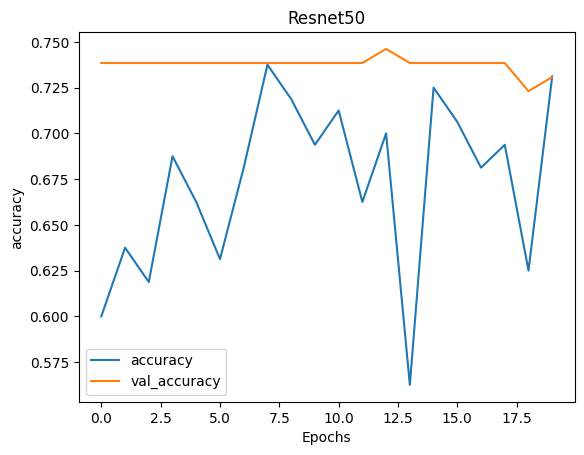

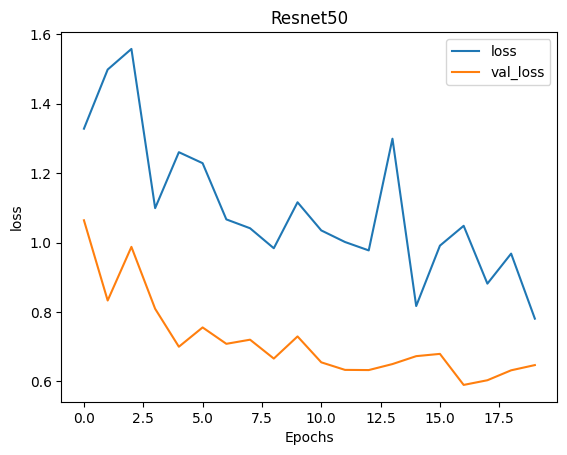

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title("Resnet50")
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,precision_recall_fscore_support
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score

In [ ]:
report=classification_report(train_generator,test_generator)
#report=precision_recall_fscore_support(y_test,pred_binary,average='micro')
print('Classification Report: '+str(report))


print("CNN")
precision=precision_score(train_generator,test_generator,average='weighted')
print('Weighted Precision: '+str(precision))

recall=recall_score(train_generator,test_generator,average='weighted')
print('Weighted Recall: '+str(recall))

#f1=f1_score(y_article_test,y_article_predict,average='weighted')
f1=(2*precision*recall)/(precision+recall)
print('Weighted F1 Score: '+str(f1))

ValueError: ignored

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

In [ ]:
base_model_2 = InceptionV3(weights = 'imagenet',
                       include_top = False,
                       input_shape = (HEIGHT, WIDTH, 3))

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
inception_model = build_model(base_model_2,
                                      dropout = dropout,
                                      fc_layers = FC_LAYERS,
                                      num_classes = len(class_list))
inception_model.compile(optimizer = RMSprop(lr = 0.00001), loss="binary_crossentropy", metrics=["accuracy"])
inception_model.summary()

1024


512
256
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                   

In [ ]:
history_2 = inception_model.fit_generator(generator = train_generator, epochs = 20, steps_per_epoch = 20,
                                       shuffle = True, validation_data = test_generator)

<ipython-input-29-2b8ccb7011eb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2 = inception_model.fit_generator(generator = train_generator, epochs = 20, steps_per_epoch = 20,


Epoch 1/20
20/20 [==============================] - 189s 10s/step - loss: 2.0060 - accuracy: 0.6938 - val_loss: 0.5891 - val_accuracy: 0.7385
Epoch 2/20
20/20 [==============================] - 139s 7s/step - loss: 0.6713 - accuracy: 0.7375 - val_loss: 0.5830 - val_accuracy: 0.7385
Epoch 3/20
20/20 [==============================] - 143s 7s/step - loss: 0.6050 - accuracy: 0.7563 - val_loss: 0.6168 - val_accuracy: 0.7385
Epoch 4/20
20/20 [==============================] - 151s 8s/step - loss: 1.7473 - accuracy: 0.7125 - val_loss: 0.5733 - val_accuracy: 0.7385
Epoch 5/20
20/20 [==============================] - 183s 9s/step - loss: 0.7282 - accuracy: 0.7437 - val_loss: 0.5653 - val_accuracy: 0.7385
Epoch 6/20
20/20 [==============================] - 187s 10s/step - loss: 0.6204 - accuracy: 0.7563 - val_loss: 0.6203 - val_accuracy: 0.7385
Epoch 7/20
20/20 [==============================] - 188s 9s/step - loss: 1.0312 - accuracy: 0.7063 - val_loss: 0.5779 - val_accuracy: 0.7385
Epoch 8/20
